# Finding the minimum energy of a QHO electron in it's ground state via modelling
## Harvey Bermingham 18003453

This notebook will follow the developent of some code to find the minimum ground state energy of an electron acting as a quantum harmonic oscillator (QHO). 

The quantum Hamiltonian will operate on the 1D and 2D ground state wave functions to find respective functions of energy. Then a bisection method will be used to accurately locate the minimum of the energy function, this will be achieved by varying $\alpha$, a variable in the ground state wave equation.

The 2D Hamiltonian applied to the wave function is given as:

Equation 1:
$$
\hat{H} = -\frac{1}{2}(\frac{d^2}{dx^2} + \frac{d^2}{dy^2}) +\frac{1}{2} ω^2 (x^2 + y^2)
$$

Where ω is the angular frequency of the wave function, in the equations ω has been set to = 1. To make this 1D all y arguments may simply be removed.

All units will be in a.u.



In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt

### 1D Quantum Harmonic Oscillator

In this section several functions will be developed, the first of which will be to find the energy of the QHO as a function of $\alpha$.

The 1D ground state wave function has a gaussian form and is given as:

Equation 2:
$$
ψ(x)= {(\frac{2α}{π})}^\frac{1}{4} e^{-αx^2}
$$

After applying the Hamiltonian the energy is given as:

Equation 3:
$$
E_{GS}=\frac{α}{2}+\frac{1}{8\alpha}
$$

Below are several functions, the first gives energy as a function of $\alpha$, as shown in Eq. 3 above. 

In [2]:
#Eq. 3 function
def QHO_E(alpha):
    """Finds the energy in a.u. of ground state electron as a function of α. 
    Uses the function QHO_E=α/2 + 1/8α
    
    Inputs:
    alpha: coordinate of function and variable
    
    Outputs:
    energy: energy value of QHO electron
    """
    
    return (alpha/2 + 1/(alpha*8))

The function defined below gives the gradient of the energy with respect to $\alpha$.

In [3]:
#gradient of Eq. 3 function
def QHO_grad(alpha):
    """Finds the gradient of the energy function at α.
    Uses the function QHO_grad=1/2 - 1/8α^2
    
    Inputs:
    alpha: coordinate of function and variable
    
    Outputs:
    gradient: gradient of energy function at α
    """
    return (1/2 - 1/(8*(alpha**2)))

This third function is a bisection function that will be used to locate the minimum of the energy function. It will accept the gradient function of energy and find the and accurate value for location of the root. Two $\alpha$ coordinates placed either side of the root, called brackets, will be required to specify the search area.

In [4]:
#bisection function
def bisection(fun,a,b,tol):
    """Uses the bisection method to find the value of alpha at the function-
    minimum that lies between a and b.
    
    Inputs:
    fun: gradient of energy function
    a: bracket in negative alpha direction of minimum
    b: bracket in positive alpha direction of minimum
    tol: accuracy of the final outputted value
    
    Outputs:
    c: alpha coordinate of function root"""
    
    f_a = fun(a)
    
    # Initialise counter
    n = 0 
    c = a
    
    #bisection method
    while abs(a-b) > tol and n < 100:
        c = (a+b)/2
        if fun(c)*f_a > 0:
            a = c
        else:
            b = c
        n += 1

    return n, c

Now the energy gradient function is plotted to be able to determine suitable values for the brackets used in the bisection function.

Text(0.5, 1.0, 'Fig1: Energy gradient as a function of α')

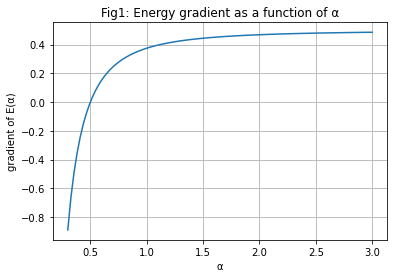

In [16]:
#plotting gradient function graph
alpha = np.linspace(0.3,3,100)
plt.plot(alpha,QHO_grad(alpha))
plt.grid()
plt.xlabel('α')
plt.ylabel("gradient of E(α)")
plt.title('Fig1: Energy gradient as a function of α')

From this graph it is possible to see that suitable brackets are 0.3 and 1.0, very easily either side of the root.

In [12]:
# defining brackets and tolerance
a = 0.3
b = 1.0
tol = 1e-14

#finding gradient root
n, alpha = bisection(QHO_grad,a,b,tol)

print('A minimum lies at α =',alpha)
print('The minimum energy value is:',QHO_E(alpha))

A minimum lies at α = 0.5000000000000042
The minimum energy value is: 0.5


These results show that the minimum energy value lies at at $\alpha$ = 0.5. The answer given is not exact to 0.5 due to innate uncertainty of the bisection method. However, as the tolerance is increased the outputted value comes closer and closer to real value of 0.5 which may be found analytically as well as visually via the graph.

The minimum value of energy has also calculated to be 0.5 using the original energy equation given above.

### 2D Quantum Harmonic Oscillator

This section will follow the same general stucture as the last, the main difference being the functions developed for energy and the energy gradient will all be in 2D as oppossed to 1D. 

These functions will be used to find the minimum value across a 2D space which requires an optimization function. This function will make use of the conjugate gradient feature which begins at a start point and searches in 360$^{\circ}$ for the most negative gradient, then it carries out a linesearch for the minimum along that line placing the new start point at the minimum and starting again.

The 2D ground state wave function has a gaussian form and is given as:

Equation 4:
$$
ψ(x,y)= {(\frac{2α}{π})}^\frac{1}{4} e^{-αx^2}{(\frac{2β}{π})}^\frac{1}{4} e^{-βy^2}
$$            

After applying the Hamiltonian the energy is given as:

Equation 5:
$$
E_{GS}=\frac{α}{2}+\frac{1}{8\alpha}+\frac{β}{2}+\frac{1}{8β}
$$

The first function below evaluates Eq. 5, it will accept arrays that hold both $\alpha$ and β and find the energy at that point, returning a scalar value. 

In [7]:
#function for Eq. 5
def QHO_2D_E(x):
    """Finds the energy in a.u. of ground state electron as a function of α and β. 
    Uses the function E_GS show in Eq. 5
    
    Inputs:
    α: coordinate of function and variable
    β: coordinate of function and variable
    
    Outputs:
    energy: energy value of QHO electron at (α,β)
    """
    
    return (x[0]/2 + 1/(x[0]*8) + x[1]/2 + 1/(x[1]*8))

Here energy function (Eq. 5) is plotted in the $\alpha$β plane to give an idea of the location of the minimum energy and how the energy varies.

Text(0.5, 1.03, 'Fig2: Energy of oscillating electron in ground state')

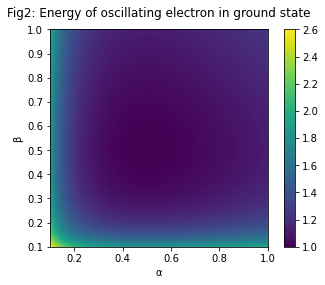

In [18]:
#creating array of αβ plane coodinates
alpha = np.linspace(0.1,1,100)
beta = np.linspace(0.1,1,100)
a_mesh, b_mesh = np.meshgrid(alpha, beta)
ab_mesh = np.array([a_mesh,b_mesh])

#plotting 2d graph
plt.imshow(QHO_2D_E(ab_mesh), origin='lower',extent=(0.1,1,0.1,1))
plt.xlabel('α')
plt.ylabel('β')
plt.colorbar()
plt.title('Fig2: Energy of oscillating electron in ground state', y=1.03)

The function to calculate the 2D gradient vector will now be defined, this will accept arrays with two rows, the first being used to give $\alpha$ and the second for β. It will calculate the partial differentials of the Eq. 5 with respect to $\alpha$ and β and output the scalar values into the first and second row of an array respectively. The ouput therefore will be the vector gradient of the Energy function at ($\alpha$,β).

In [9]:
#gradient function of Eq. 5
def QHO_2D_grad(x):
    """Finds the vector gradient of the 2D energy function at coordinates (α,β).
    
    Inputs:
    x: array that holds the α,β coordinate in the form [α,β]
    
    Outputs:
    gradient of E(α,β): the vector gradients of the function in array form with-
    respect to α and β, [dE_dα,dE_dβ]
    """
    
    #calculating vectors
    dE_dα = (1/2 - 1/(8*(x[0]**2))) 
    dE_dβ = (1/2 - 1/(8*(x[1]**2)))
    
    return np.array([dE_dα,dE_dβ])

The optimisation function along with the newly defined functions above are now used to find the minimum energy coordinate in the $\alpha$β plane.

In [10]:
from scipy import optimize

#start point
x0 = np.array([0.1,0.2])

tolerance = 1e-6

opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac=QHO_2D_grad, tol = tolerance)

Printing solutions:

In [11]:
print('Optimisation success?:',opt_result.success)
print('The minimum energy in the αβ plane is found to lie at the coordinates:',opt_result.x)
print('The minimum energy is:',QHO_2D_E(opt_result.x))
print('The optimisation tool took',opt_result.nit,'iteration(s) to complete.')

Optimisation success?: True
The minimum energy in the αβ plane is found to lie at the coordinates: [0.50000001 0.50000002]
The minimum energy is: 1.0000000000000004
The optimisation tool took 6 iteration(s) to complete.


### Conclusions

This development of code has worked well, by the end it was possible to use the functions defined to identify the minimum energy coordinates and therefore the minimum energy of a QHO electron in it's groundstate. The values outputted above from the optimisation function are match the values that can be read from the graph in Fig. 2.

It was noticed that when the x0 variable was set to (0,0) errors would occur for the optimize.minimize function, this was found to be as a result of the energy equations, where coordinate variables have negative indicies. From this we know in this case it is not possible to start the optimization from x0 = (0,0).